# Health Insurance Lead Prediction

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
#reading the data

train = pd.read_csv('C:/Users/Acer/Desktop/Prashant/Machine Learning/Xercise/Analytics Vidhya/Health Insurance Lead Prediction/train_data.csv')
test = pd.read_csv('C:/Users/Acer/Desktop/Prashant/Machine Learning/Xercise/Analytics Vidhya/Health Insurance Lead Prediction/test_data.csv')

#shapes of dataset

print('Shape of Train dataset: ', train.shape)
print('Shape of Test dataset: ', test.shape)

Shape of Train dataset:  (50882, 14)
Shape of Test dataset:  (21805, 13)


## DATA ANALYSIS

In [3]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,0


In [4]:
test.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium
0,50883,C1,156,Owned,Individual,30,30,No,NaN,6.0,3.0,5,11934.0
1,50884,C4,7,Owned,Joint,69,68,Yes,X1,3.0,3.0,18,32204.8
2,50885,C1,564,Rented,Individual,28,28,No,X3,2.0,4.0,17,9240.0
3,50886,C3,1177,Rented,Individual,23,23,No,X3,3.0,3.0,18,9086.0
4,50887,C1,951,Owned,Individual,75,75,No,X3,NaN,NaN,5,22534.0


In [5]:
#describing the training set

train.describe(include = 'all')

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882,50882.000000,50882,50882,50882.000000,50882.000000,50882,39191,30631,30631.000000,50882.000000,50882.000000,50882.000000
unique,NaN,36,NaN,2,2,NaN,NaN,2,9,15,NaN,NaN,NaN,NaN
top,NaN,C1,NaN,Owned,Individual,NaN,NaN,No,X1,1,NaN,NaN,NaN,NaN
freq,NaN,8973,NaN,27951,40536,NaN,NaN,42460,13010,4499,NaN,NaN,NaN,NaN
mean,25441.500000,NaN,1732.788707,NaN,NaN,44.856275,42.738866,NaN,NaN,NaN,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,NaN,1424.081652,NaN,NaN,17.310271,17.319375,NaN,NaN,NaN,1.025923,6.340663,6590.074873,0.427055
min,1.000000,NaN,1.000000,NaN,NaN,18.000000,16.000000,NaN,NaN,NaN,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,NaN,523.000000,NaN,NaN,28.000000,27.000000,NaN,NaN,NaN,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,NaN,1391.000000,NaN,NaN,44.000000,40.000000,NaN,NaN,NaN,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,NaN,2667.000000,NaN,NaN,59.000000,57.000000,NaN,NaN,NaN,3.000000,20.000000,18096.000000,0.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [7]:
#Checking the null value in dataset

train.isnull().any()

ID                         False
City_Code                  False
Region_Code                False
Accomodation_Type          False
Reco_Insurance_Type        False
Upper_Age                  False
Lower_Age                  False
Is_Spouse                  False
Health Indicator            True
Holding_Policy_Duration     True
Holding_Policy_Type         True
Reco_Policy_Cat            False
Reco_Policy_Premium        False
Response                   False
dtype: bool

In [8]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

Here, understanding the response in regards to the survey.

In [9]:
train['Response'].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [10]:
# percentage of postive response

positive_response = (12209/(38673+12209))*100
print('Percentage of Total Positive Response Received is: ', positive_response)

Percentage of Total Positive Response Received is:  23.99473291144216


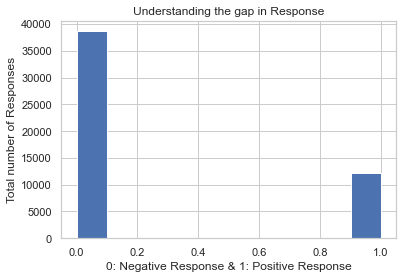

In [11]:
# Understanding the gap in response through chart

plt.hist(train['Response'])
plt.title('Understanding the gap in Response')
plt.xlabel('0: Negative Response & 1: Positive Response')
plt.ylabel('Total number of Responses')
plt.show()


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


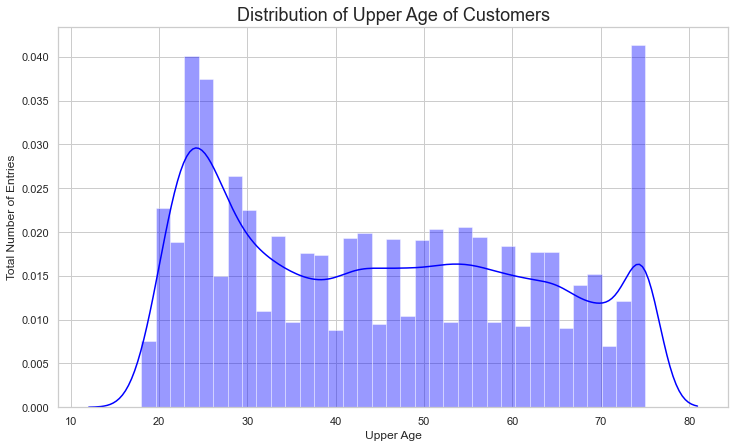

In [12]:
#distribution of upper_age of customers

plt.rcParams['figure.figsize'] = [12,7]
sns.distplot(train['Upper_Age'], color = 'blue')
plt.title('Distribution of Upper Age of Customers',  fontsize = 18)
plt.xlabel('Upper Age')
plt.ylabel('Total Number of Entries')
plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


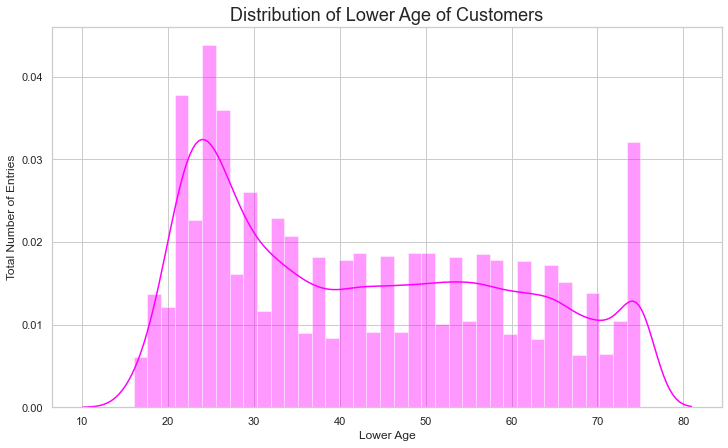

In [13]:
#distribution of lower_age of customers

plt.rcParams['figure.figsize'] = [12,7]
sns.distplot(train['Lower_Age'], color = 'magenta')
plt.title('Distribution of Lower Age of Customers', fontsize = 18)
plt.xlabel('Lower Age')
plt.ylabel('Total Number of Entries')
plt.show()

In [14]:
#Understanding Accomodation Type
train['Accomodation_Type'].value_counts()

Owned     27951
Rented    22931
Name: Accomodation_Type, dtype: int64

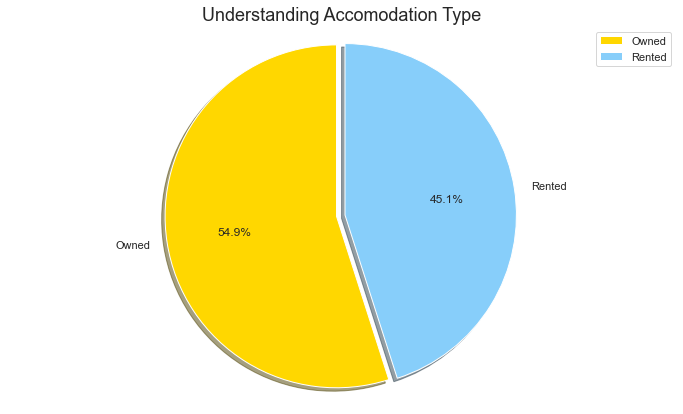

In [15]:
size = [27951, 22931]
labels = 'Owned', 'Rented'
colors = 'gold', 'lightskyblue'
explode = (0.05, 0)

fig1, ax1 = plt.subplots()
ax1.pie(size, labels = labels,startangle = 90,  colors = colors, explode = explode, autopct = '%1.1f%%' , shadow = True)
ax1.axis('equal')
plt.title('Understanding Accomodation Type', fontsize = 18)
plt.legend()
plt.show()

In [16]:
#Understanding Reco_Insurance_Type
train['Reco_Insurance_Type'].value_counts()

Individual    40536
Joint         10346
Name: Reco_Insurance_Type, dtype: int64

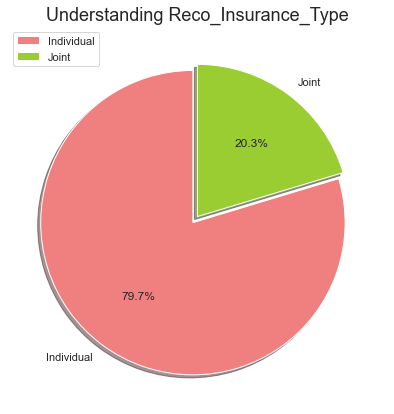

In [17]:
size = [40536, 10346]
labels = 'Individual', 'Joint'
colors = 'lightcoral', 'yellowgreen'

plt.pie(size, labels = labels, startangle = 90, colors = colors, explode = explode, autopct='%1.1f%%', shadow = True)
plt.title('Understanding Reco_Insurance_Type', fontsize = 18)
plt.legend()
plt.show()

In [18]:
#understanding Is_Spouse in dataset

train['Is_Spouse'].value_counts()

No     42460
Yes     8422
Name: Is_Spouse, dtype: int64

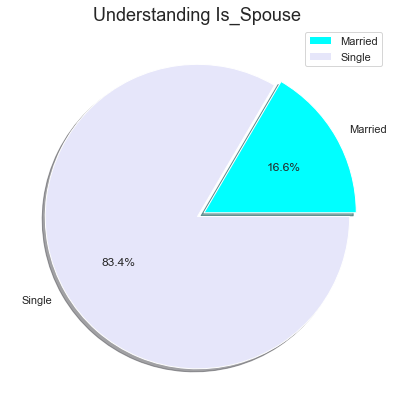

In [19]:
size = [8422, 42460]
labels = 'Married', 'Single'
colors = 'cyan', 'lavender'
plt.pie(size, labels = labels, startangle = 0, colors = colors, explode = explode, autopct = '%1.1f%%', shadow = True)
plt.legend()
plt.title('Understanding Is_Spouse', fontsize = 18)
plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


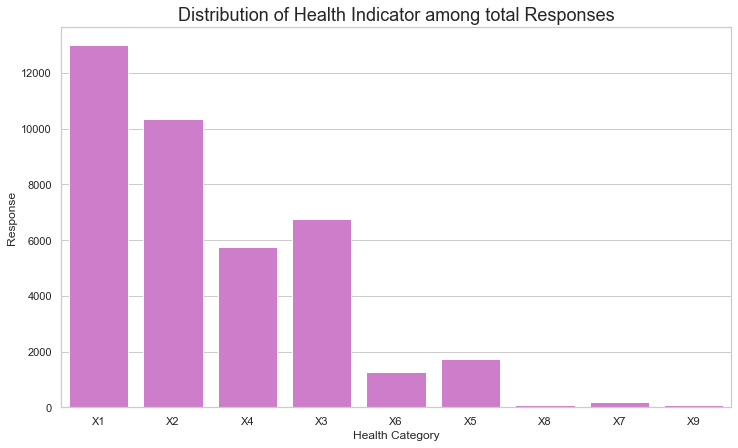

In [20]:
#understanding distribution of Health Indicator

plt.rcParams['figure.figsize'] = [12,7]
sns.countplot(train['Health Indicator'], color = 'orchid')
plt.title('Distribution of Health Indicator among total Responses', fontsize =18)
plt.xlabel('Health Category')
plt.ylabel('Response')
plt.show()

As per dataset, replacing 14+ with 15 for the sake of understanding the distribution

In [21]:
train['Holding_Policy_Duration'] = train['Holding_Policy_Duration'].replace(['14+'], 15.0)
train['Holding_Policy_Duration'].head(10)

0     15
1    NaN
2      1
3     15
4      3
5      5
6    NaN
7      9
8     14
9      7
Name: Holding_Policy_Duration, dtype: object

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


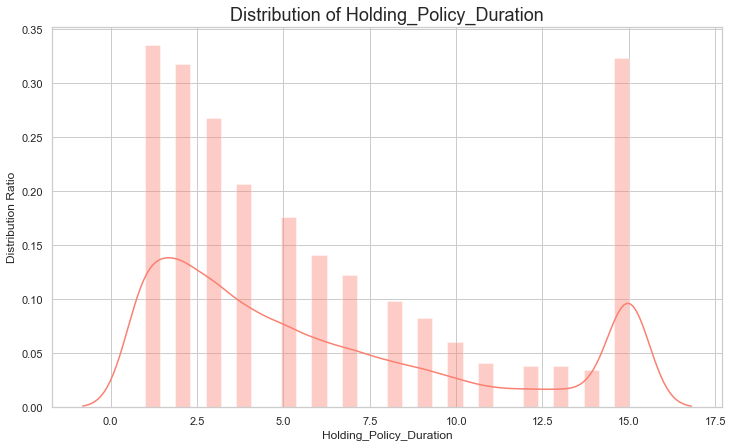

In [22]:
size = train['Holding_Policy_Duration']

plt.rcParams['figure.figsize'] = [12,7]
sns.distplot(size, color = 'salmon')
plt.title('Distribution of Holding_Policy_Duration', fontsize = 18)
plt.xlabel('Holding_Policy_Duration')
plt.ylabel('Distribution Ratio')
plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


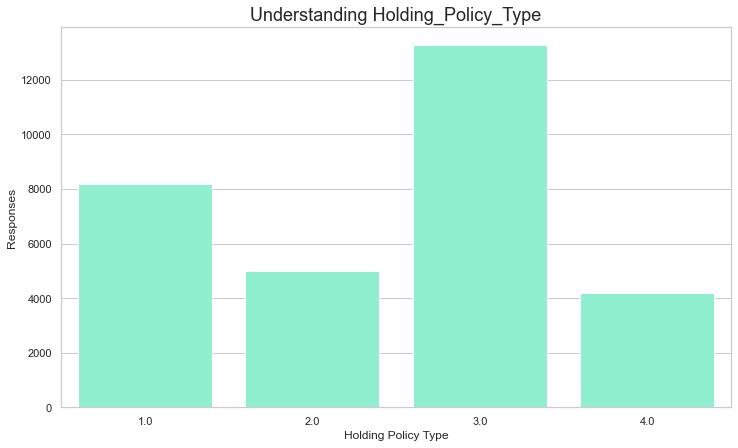

In [23]:
#understanding the Holding_Policy_Type

plt.rcParams['figure.figsize'] = [12,7]
sns.countplot(train['Holding_Policy_Type'], color = 'aquamarine')
plt.title('Understanding Holding_Policy_Type', fontsize = 18)
plt.xlabel('Holding Policy Type')
plt.ylabel('Responses')
plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


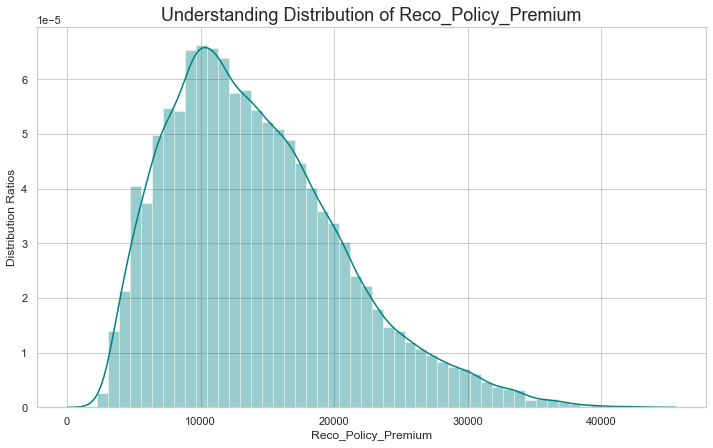

In [24]:
#understanding the distribution of Reco_Policy_Premium

plt.rcParams['figure.figsize'] = [12,7]
sns.distplot(train['Reco_Policy_Premium'], color = 'teal')
plt.title('Understanding Distribution of Reco_Policy_Premium', fontsize =18)
plt.xlabel('Reco_Policy_Premium')
plt.ylabel('Distribution Ratios')
plt.show()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


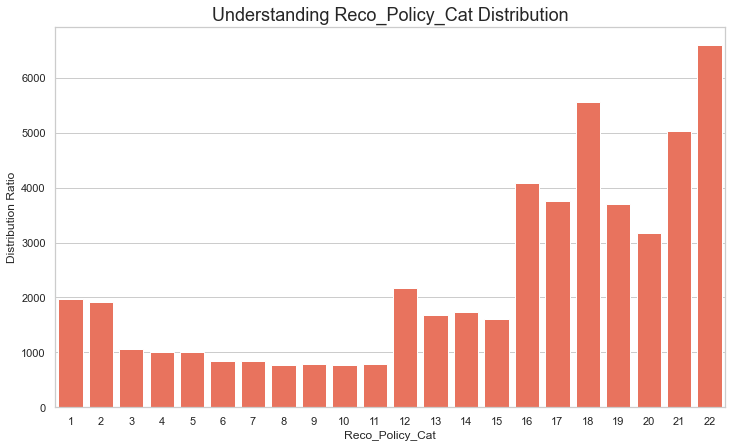

In [25]:
#understanding Reco_Policy_Cat

plt.rcParams['figure.figsize'] = [12,7]
sns.countplot(train['Reco_Policy_Cat'], color = 'tomato')
plt.title('Understanding Reco_Policy_Cat Distribution', fontsize = 18)
plt.xlabel('Reco_Policy_Cat')
plt.ylabel('Distribution Ratio')
plt.show()

In [26]:
#Understanding the City_Code Entries

def group_lower_ranking_values(column):
    city_code_counts = train.groupby(column).agg('count')
    q_val = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
    pct_value = city_code_counts[lambda x: x.columns[0]].quantile(0.6)
    values_below_pct_value = city_code_counts[lambda x: x.columns[0]].loc[lambda s: s < pct_value].index.values
    def fix_values(row):
        if row[column] in values_below_pct_value:
            row[column] = 'Others'
        return row
    city_code_grouped = train.apply(fix_values, axis=1).groupby(column).agg('count')
    return city_code_grouped

In [27]:
city_code_grouped = group_lower_ranking_values('City_Code')
city_code_grouped.reset_index(level = 0, inplace = True)
city_code_labels = city_code_grouped.City_Code.values
city_code_counts = city_code_grouped.ID.values

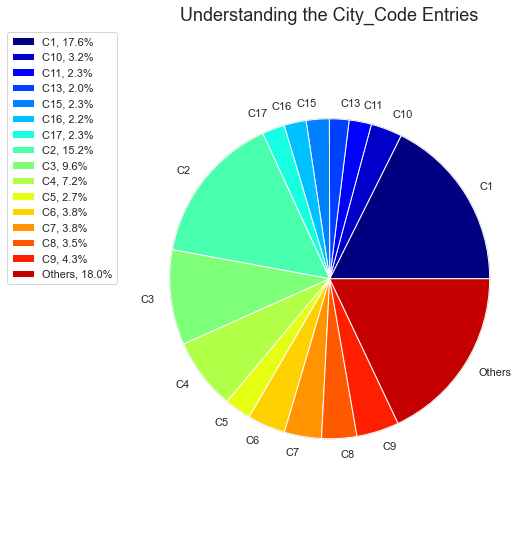

In [28]:
size = city_code_counts

fig1, ax1 = plt.subplots(figsize=(7,7))
fig1.subplots_adjust(0.3, 0, 1, 1)

theme = plt.get_cmap('jet')
ax1.set_prop_cycle('color', [theme(1.*i/len(size))
                            for i in range(len(size))])

ax1.pie(size, labels = city_code_labels, shadow = True, startangle=0, radius = 1800)

ax1.axis('equal')

total = sum(size)
plt.legend(loc = 'upper left', labels=['%s, %1.1f%%' %( l, (float(s)/total)*100)
                                      for l,s in zip(city_code_labels, size)],
          prop = {'size': 11},
          bbox_to_anchor=(0.0, 1),
          bbox_transform = fig1.transFigure)
plt.title('Understanding the City_Code Entries', fontsize = 18)
plt.show()

### SUMMARISING ABOVE ANALYSIS
1. **City_Code** : The maximum responses are received for the city with codes C9, C8, C7, C6, C5, which covers almost 50% of the total responses.
2. **Accomodation_Type** : The Accomodation reponses have been slightly more for *OWNED* houses.
3. **Reco_Insurance_Type** : The recommended Insurance type selected by the customers have mostly been *Individual*. The customers looks for the insurance for their own, and relatively insignificant, i.e. ***20.3%*** people looks for *Joint* insurance schemes.
4. **Upper_Age** & **Lower_Age** : As most customers are looking forward towards individual type of insurance, the upper & lower age has almost similar distribution as per the given data.
5. **Is_Spouse** : A very relatively less percentage of people are married. Almost ***84%*** percent are single, and the chances are these people are more likely to buy individual schemes. Nevertheless, the waitage of the above can not be provided without further investigation.
6. **Health Indicator** : Going by the data, it is very much understood that the person with good health or lesser health problems are more likely to buy insuarance. This is because, as the age distribution analysis suggests, the person with age around 20-30 are highly interested to buy insuarance. The health deteriorates with the age, and this can be understood as the distribution line keeps on decreasing with age, until the age of 70. There is slight surge in the inquiry status for people with deteriorated health. Primarilily, this can also be co-related to the age distribution graph, which has an upward trend towards the end of the graph.
7. **Holding_Policy_Duration** : As from the data, the distribution is skewed towards the end of the graph. After reaching the saturation limit, the distribution graph goes on decline, which iterates that the person with the policy are not likely to buy a new policy. Although, this is a priliminary analysis, and the eventuality of the person interested can not be written off at the current stage.
8. **Holding_Policy_Type** : From the graph, it is difficult to understand how a Holding Policy Type is relevant in the dataset. However, a further analysis on the relation with the response will eventually negate any doubts. The graph do lead us to information about which policy customers are holding currently.
9. **Reco_Policy_Cat** : Although there are less details which gives information regarding policy details, it can atleast be known that policy in higher category are mostly recommended to the customers. The impact of the recommended policy on the decision making is not known, but it certainily will be a key factor in regards to the customers responses.
10. **Reco_Policy_Premium**: Recommended policy premium serves the normal distribution curve. It is easy to interpret, and as from the graph it is understood that customers are recommended the policies which has the premium around 10000 amount.
11. **Response** : The main reason for doing the analysis is to understand the how to determine a positive feedback on the basis of a given data. The preliminary analysis have resulted in giving away just ***23.99%***, which is very sluggish in regards to the number of survey details.

## CO-RELATION ANALYSIS

In [29]:
train.corr()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
ID,1.000000,-0.000465,-0.001725,0.001101,0.006649,-0.002235,-0.002350,0.005159
Region_Code,-0.000465,1.000000,-0.005649,-0.005928,0.011599,-0.065120,-0.010797,0.001121
Upper_Age,-0.001725,-0.005649,1.000000,0.921392,0.141890,0.025257,0.792689,0.002772
Lower_Age,0.001101,-0.005928,0.921392,1.000000,0.118028,0.021163,0.615739,-0.002099
Holding_Policy_Type,0.006649,0.011599,0.141890,0.118028,1.000000,0.079678,0.121342,0.009297
Reco_Policy_Cat,-0.002235,-0.065120,0.025257,0.021163,0.079678,1.000000,0.060989,0.114321
Reco_Policy_Premium,-0.002350,-0.010797,0.792689,0.615739,0.121342,0.060989,1.000000,0.007943
Response,0.005159,0.001121,0.002772,-0.002099,0.009297,0.114321,0.007943,1.000000


Text(0.5, 1.0, 'Co-Relation of all features in DataSet')

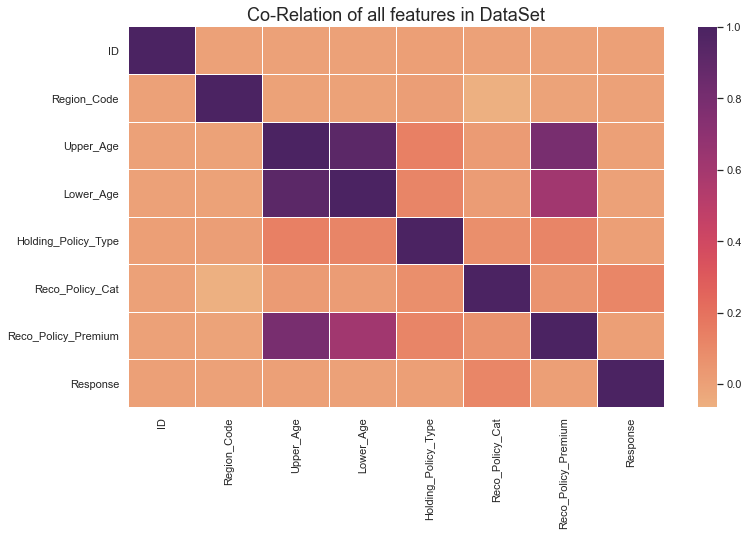

In [30]:
sns.heatmap(train.corr(), cmap="flare", linewidths= 0.03)
plt.title('Co-Relation of all features in DataSet', fontsize = 18)

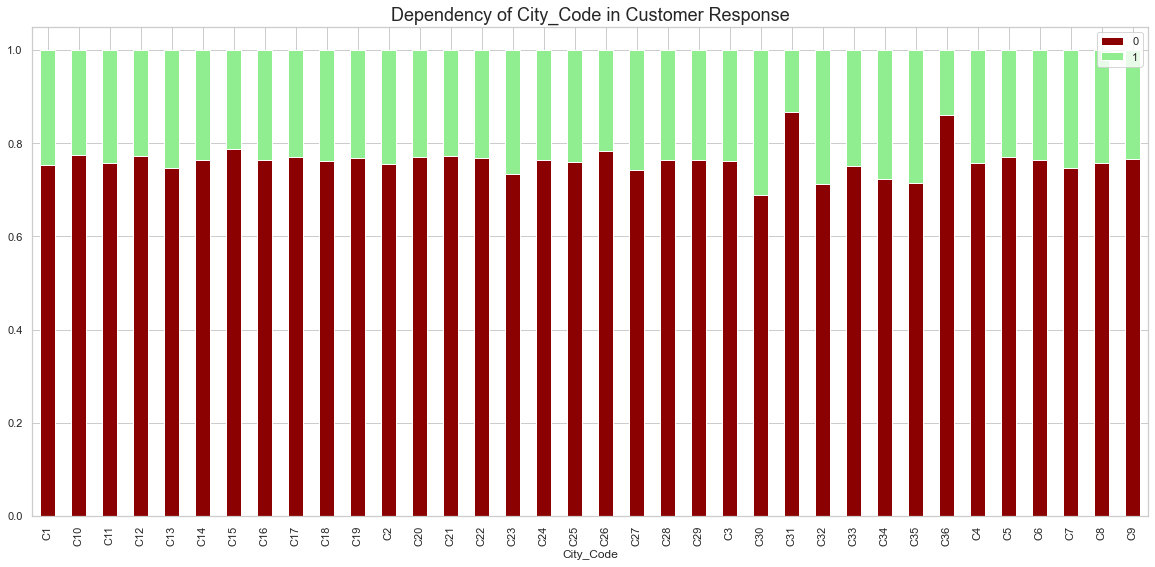

In [31]:
#understanding the co-relation between city code & Response

data = pd.crosstab(train['City_Code'], train['Response'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['darkred', 'lightgreen'])

plt.title('Dependency of City_Code in Customer Response', fontsize = 18)
plt.xlabel('City_Code')
plt.legend()
plt.show()

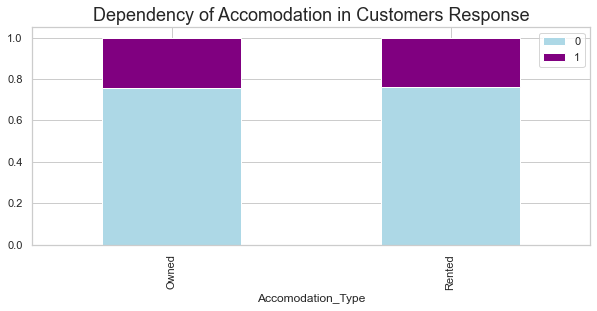

In [32]:
#dependency of Accomodation on Response

data = pd.crosstab(train['Accomodation_Type'], train['Response'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 4), color = ['lightblue', 'purple'])

plt.title('Dependency of Accomodation in Customers Response', fontsize = 18)
plt.legend()
plt.show()

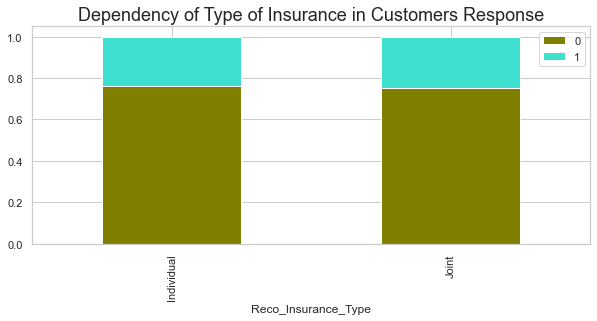

In [33]:
#dependency of Insurance_Type on Response

data = pd.crosstab(train['Reco_Insurance_Type'], train['Response'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 4), color = ['olive', 'turquoise'])

plt.title('Dependency of Type of Insurance in Customers Response', fontsize = 18)
plt.legend()
plt.show()

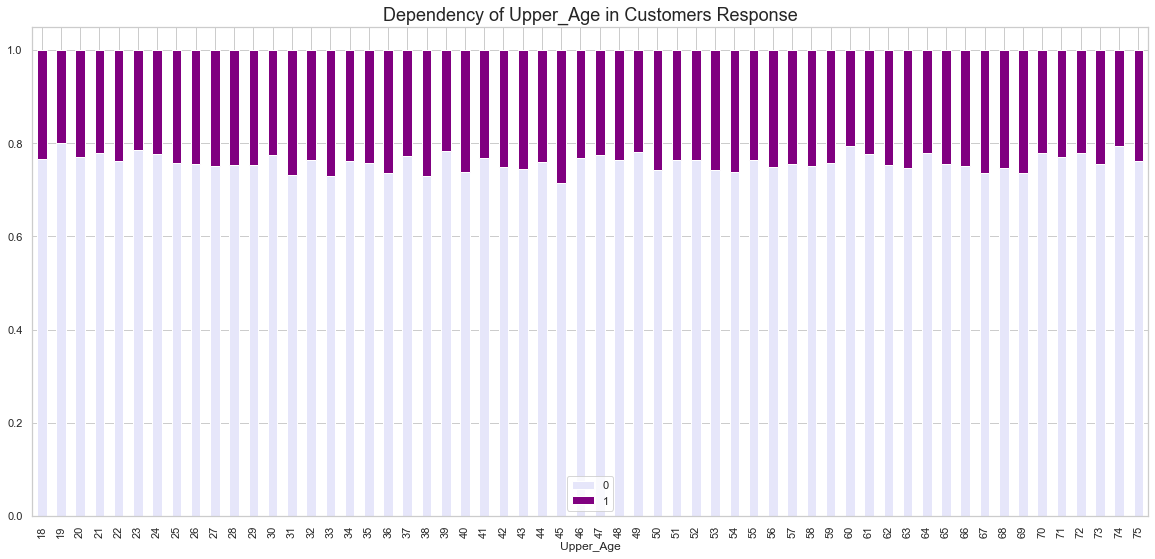

In [34]:
#dependency of Upper_Age on Response

data = pd.crosstab(train['Upper_Age'], train['Response'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['lavender', 'purple'])

plt.title('Dependency of Upper_Age in Customers Response', fontsize = 18)
plt.legend()
plt.show()

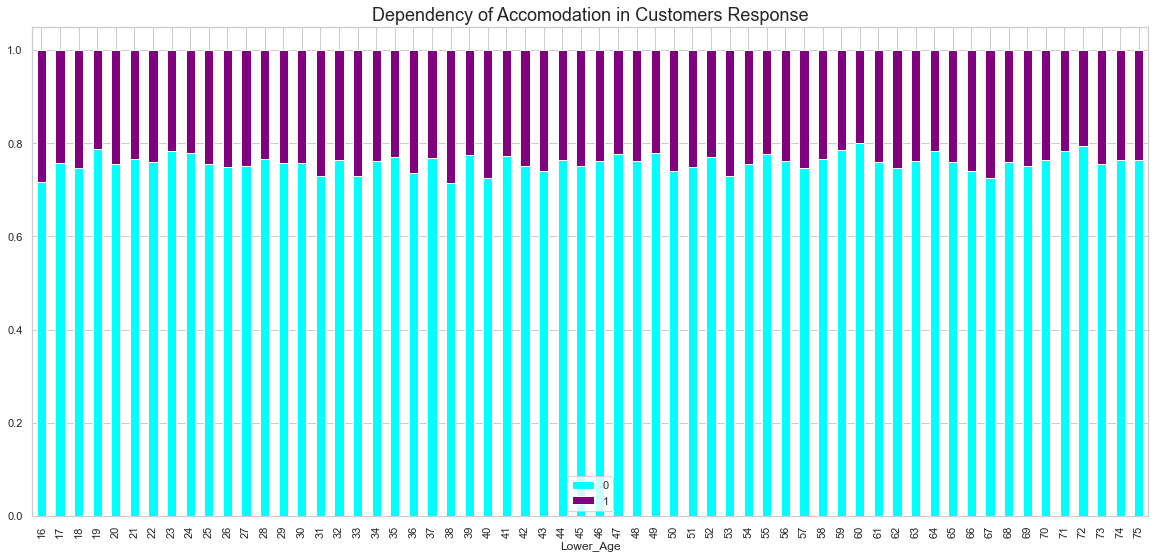

In [35]:
#dependency of Lower_Age on Response

data = pd.crosstab(train['Lower_Age'], train['Response'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['aqua', 'purple'])

plt.title('Dependency of Accomodation in Customers Response', fontsize = 18)
plt.legend()
plt.show()


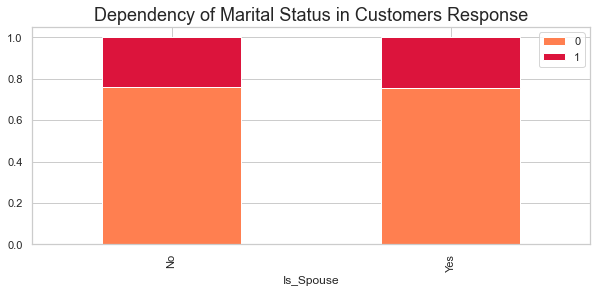

In [36]:
##dependency of Is_Spouse on Response

data = pd.crosstab(train['Is_Spouse'], train['Response'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10, 4), color = ['coral', 'crimson'])

plt.title('Dependency of Marital Status in Customers Response', fontsize = 18)
plt.legend()
plt.show()

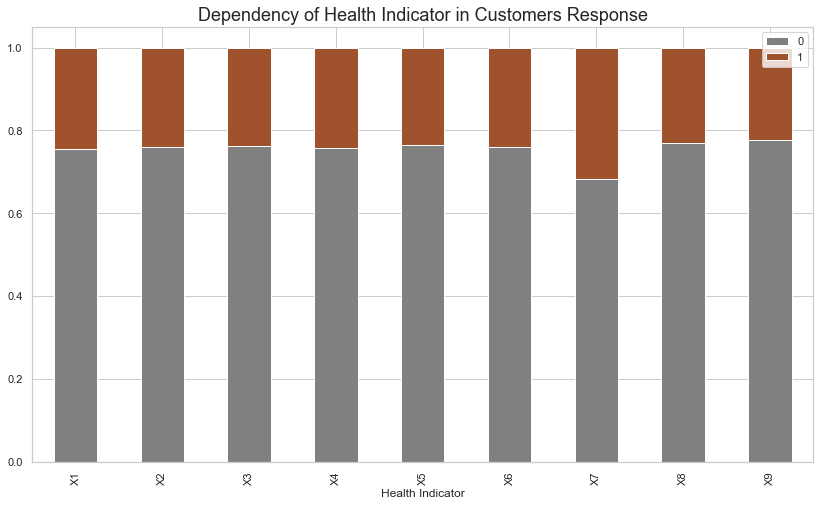

In [37]:
#dependency of Health_Indicator on Response

data = pd.crosstab(train['Health Indicator'], train['Response'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (14, 8), color = ['grey', 'sienna'])

plt.title('Dependency of Health Indicator in Customers Response', fontsize = 18)
plt.legend()
plt.show()





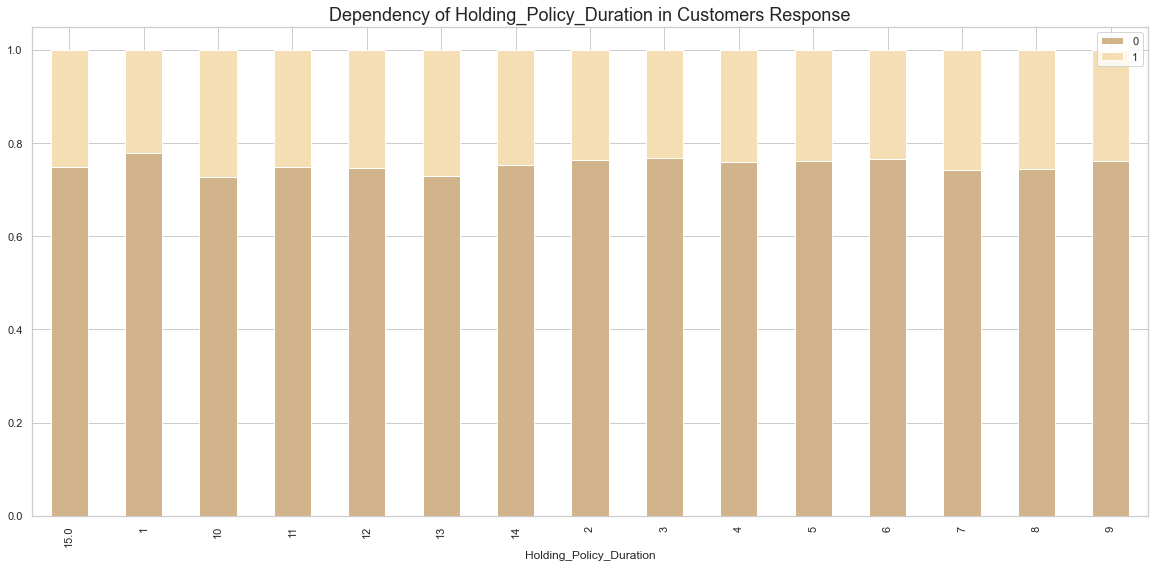

In [38]:
#dependency of Holding_Policy_Duration on Response

data = pd.crosstab(train['Holding_Policy_Duration'], train['Response'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['tan', 'wheat'])

plt.title('Dependency of Holding_Policy_Duration in Customers Response', fontsize = 18)
plt.legend()
plt.show()

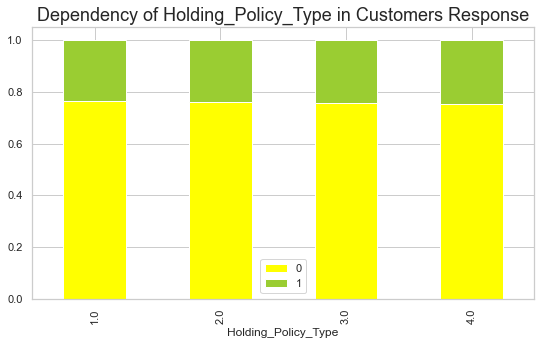

In [39]:
#dependency of Holding_Policy_Type on Response

data = pd.crosstab(train['Holding_Policy_Type'], train['Response'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (9, 5), color = ['yellow', 'yellowgreen'])

plt.title('Dependency of Holding_Policy_Type in Customers Response', fontsize = 18)
plt.legend()
plt.show()


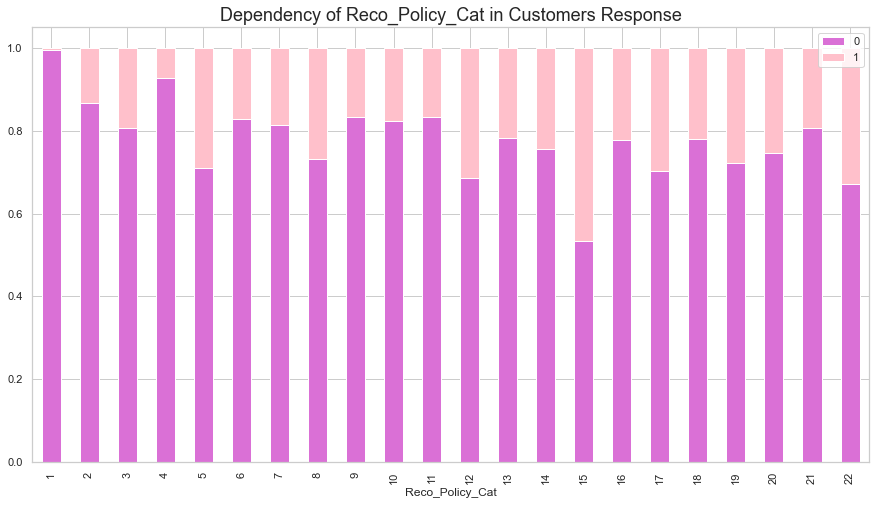

In [40]:
#dependency of Reco_Policy_Cat on Response

data = pd.crosstab(train['Reco_Policy_Cat'], train['Response'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 8), color = ['orchid', 'pink'])

plt.title('Dependency of Reco_Policy_Cat in Customers Response', fontsize = 18)
plt.legend()
plt.show()



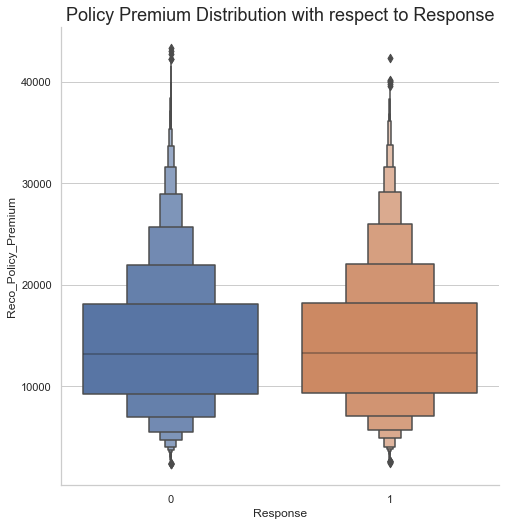

In [41]:

sns.catplot(x = 'Response', y = 'Reco_Policy_Premium' , kind = 'boxen', height = 7 ,data = train)
plt.title('Policy Premium Distribution with respect to Response', fontsize = 18)
plt.show()

In [42]:
train.groupby('Response')['Reco_Policy_Cat', 'Reco_Policy_Premium'].describe()

<ipython-input-42-e46df6904104>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  train.groupby('Response')['Reco_Policy_Cat', 'Reco_Policy_Premium'].describe()


Reco_Policy_Cat                                                    \
                   count       mean       std  min   25%   50%   75%   max   
Response                                                                     
0                38673.0  14.707910  6.602637  1.0  11.0  17.0  20.0  22.0   
1                12209.0  16.405275  5.222653  1.0  14.0  18.0  21.0  22.0   

         Reco_Policy_Premium                                             \
                       count          mean          std     min     25%   
Response                                                                  
0                    38673.0  14154.537827  6584.799295  2280.0  9226.0   
1                    12209.0  14277.115734  6606.163683  2408.0  9282.0   

                                     
              50%      75%      max  
Response                             
0         13140.0  18086.4  43350.4  
1         13280.0  18210.0  42316.8

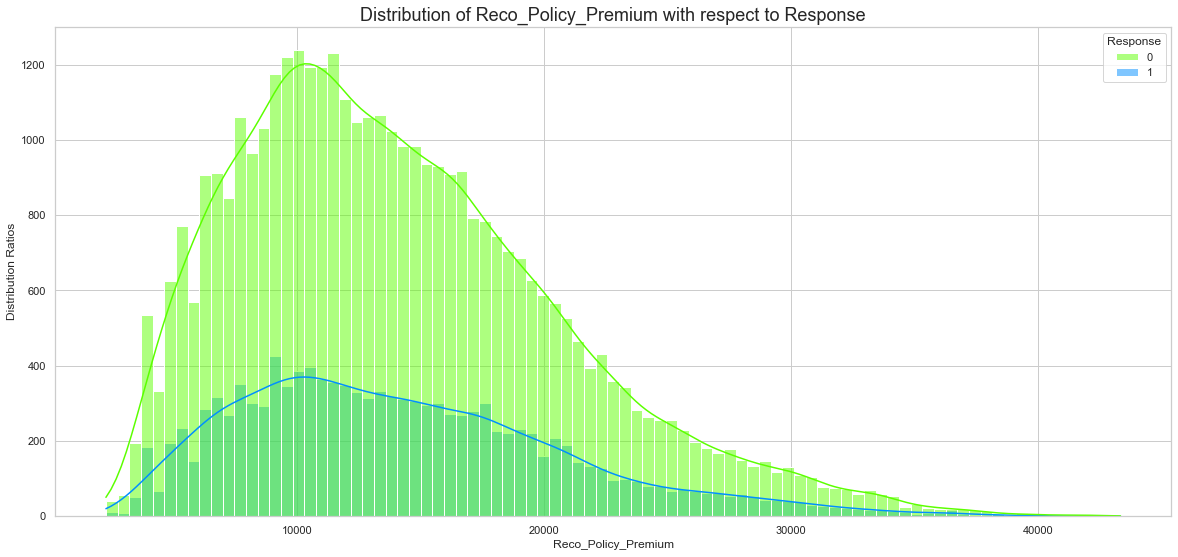

In [43]:
#Distribution of Reco_Policy_Premium with respect to Response

plt.rcParams['figure.figsize'] = [20,9]
sns.histplot(x = train['Reco_Policy_Premium'],hue = train['Response'], kde = True, palette= 'gist_rainbow')
plt.title('Distribution of Reco_Policy_Premium with respect to Response', fontsize =18)
plt.xlabel('Reco_Policy_Premium')
plt.ylabel('Distribution Ratios')
plt.show()

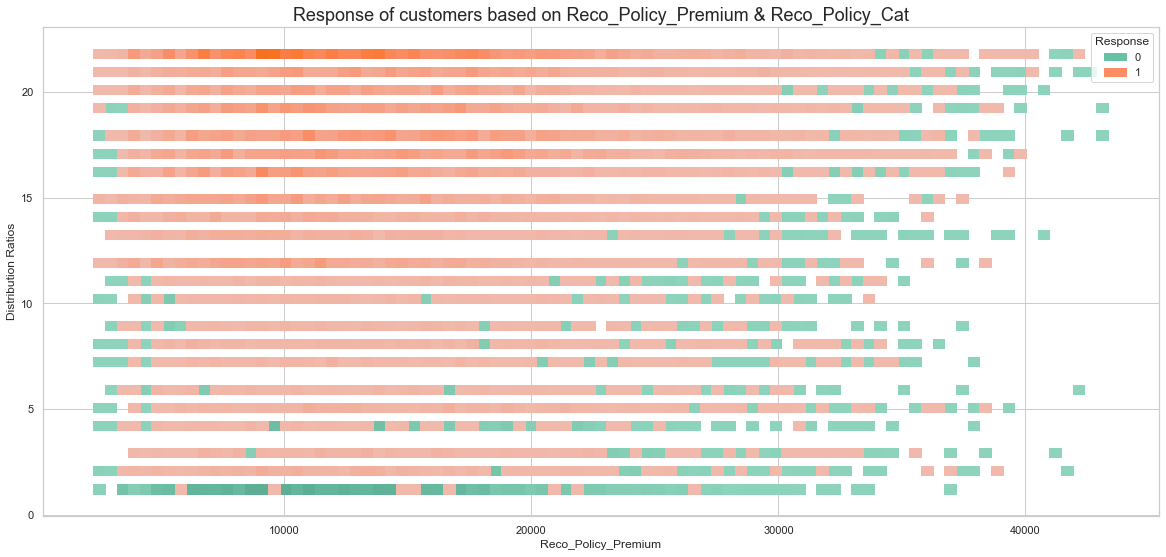

In [44]:
#Response of customers based on Reco_Policy_Premium & Reco_Policy_Cat 

plt.rcParams['figure.figsize'] = [20,9]
sns.histplot(x = train['Reco_Policy_Premium'], y = train['Reco_Policy_Cat'] ,hue = train['Response'], kde = True, palette= 'Set2')
plt.title('Response of customers based on Reco_Policy_Premium & Reco_Policy_Cat', fontsize =18)
plt.xlabel('Reco_Policy_Premium')
plt.ylabel('Distribution Ratios')
plt.show()

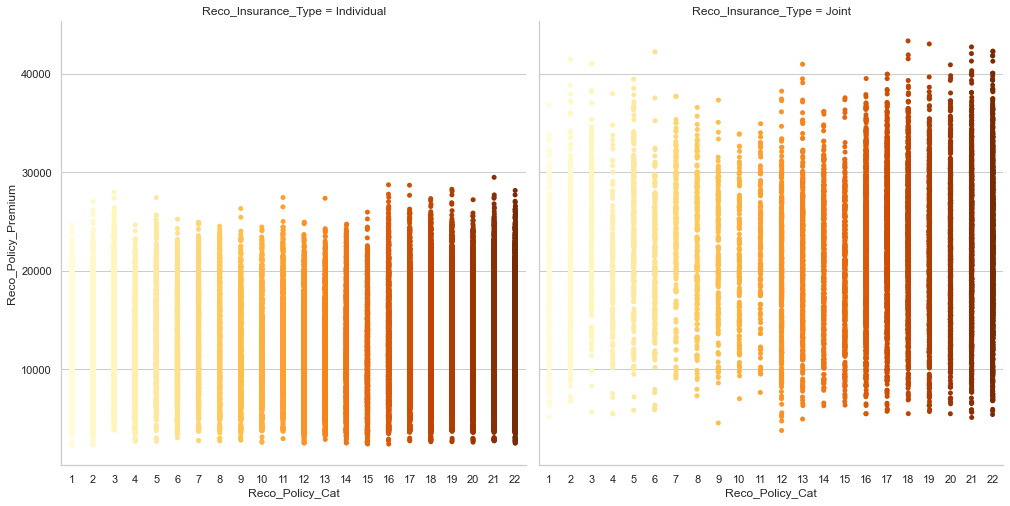

In [45]:
#understanding the relationship between Recommended Policy Category, Premium with respect to Insurance Type

plt.rcParams['figure.figsize'] = [20,9]
sns.catplot(x='Reco_Policy_Cat', y='Reco_Policy_Premium', col = 'Reco_Insurance_Type',  data = train,
            kind = 'strip', jitter = 0.01, height = 7, palette = 'YlOrBr' )

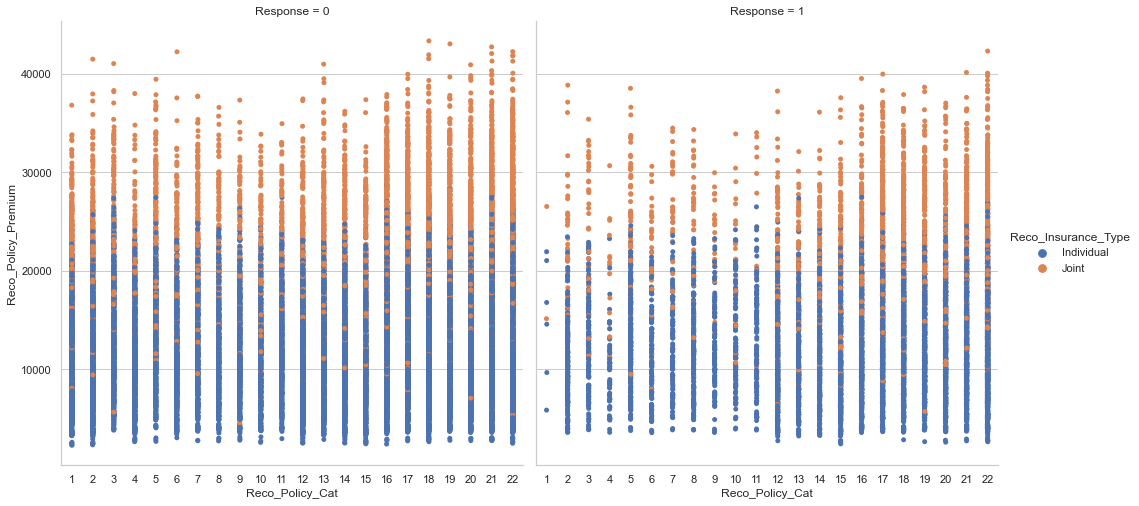

In [46]:
#Relationships with Response & Recommended Policy Types, Cat, Premium

plt.rcParams['figure.figsize'] = [20,9]
sns.catplot(x='Reco_Policy_Cat', y='Reco_Policy_Premium', hue = 'Reco_Insurance_Type', col = 'Response'  ,data = train,
            kind = 'strip', jitter = 0.01, height = 7,)

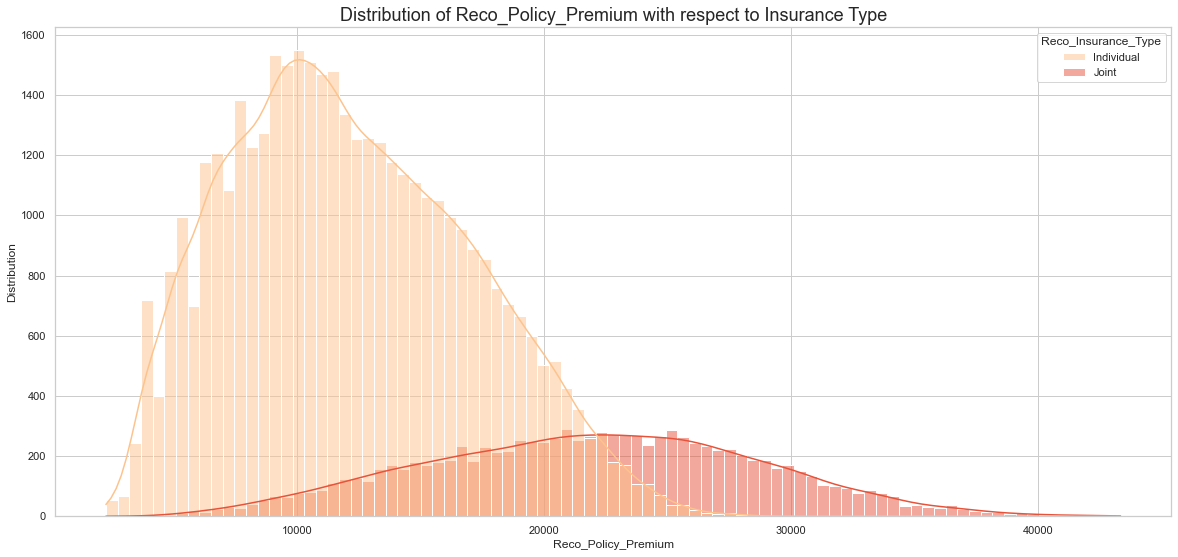

In [47]:
plt.rcParams['figure.figsize'] = [20,9]
sns.histplot(x = train['Reco_Policy_Premium'],hue = train['Reco_Insurance_Type'], kde = True, palette= 'OrRd')
plt.title('Distribution of Reco_Policy_Premium with respect to Insurance Type', fontsize =18)
plt.xlabel('Reco_Policy_Premium')
plt.ylabel('Distribution')
plt.show()


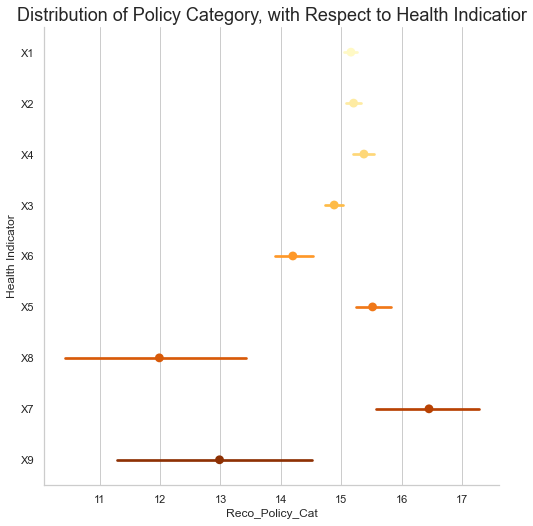

In [48]:
#understanding the relationship between Recommended Policy Category with respect to Health Indicator

plt.rcParams['figure.figsize'] = [20,9]
sns.catplot(x='Reco_Policy_Cat', y = 'Health Indicator',  data = train,
             kind = 'point', height = 7,  palette = 'YlOrBr' )
plt.title('Distribution of Policy Category, with Respect to Health Indicatior', fontsize = 18)
plt.show()

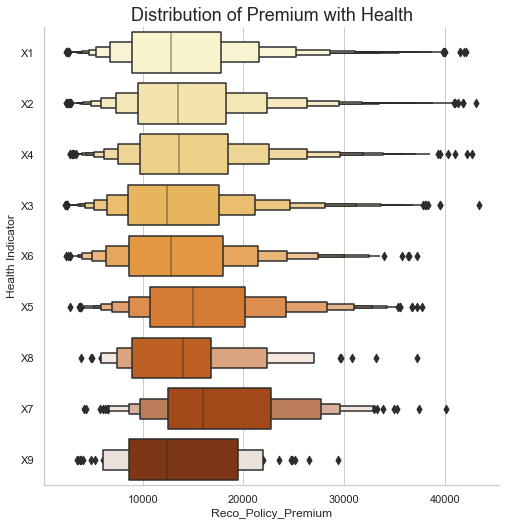

In [49]:
#understanding the relationship between Recommended Policy Premium with respect to Health Indicator

plt.rcParams['figure.figsize'] = [20,9]
sns.catplot(x='Reco_Policy_Premium', y = 'Health Indicator',  data = train,
            kind = 'boxen', height = 7, palette = 'YlOrBr' )
plt.title('Distribution of Premium with Health', fontsize = 18)
plt.show()

### SUMMARIZING CO-RELATION ANALYSIS
1. **City_Code** : City code does not have major dependency in the customers' response. Although C31 & c36 have relatively less positive response, but as seen in the previous analysis, they contribute a mearge amount of total responses, so it is good to ignore them for any future analysis.
2. **Accomodation_Type** : The house ownership is irrelevent in the decision making. From both the analysis, it is clear it can be ignored for future analysis.
3. **Reco_Insurance_Type** : As already seen previously, most people prefer Individual Insurance Type, and from further investigation, this aspect of the study has been true. Also, the significance of insurance type is also similar. But, Insurance type determines the insurance category & Insurance Category defines Insurance Premium, which makes Recommended Insurance Type a dependent variable.
4. **Upper_Age & Lower_Age** : The effect of age has been less relevant to the decison making of the customer. Although, it usually helps in understanding the health category, but the dependency is too mearge, and can be ignored.
5. **Is_Spouse** : The marital status is not relevant in making decision. Also, a similar variable, i.e. Insurance Type is already a dependent variable, and thus it is better if the variable is ignored to avoid complications.
6. **Health Indicator** : The health indicator decides on which category a person is issued an insurance with. It's dependency is understanding the Insurance Category is staright forward. As the study states, the indicator does not rely on response, and thus it is advisable to ignore it too.
7. **Holding_Policy_Duration** : The determines is directly proportional to recommended policy. However, the dependency is redundunt, and hence the variable is ignored for further analysis.
8. **Holding_Policy_Type** : The response is not dependent on Holding Policy Type, and it is better if the variable is not considered for further procedures.
9. **Reco_Policy_Cat** : It by far the most dependent to the response outcome, directly. It is important to assign a certain weightage to this variable, as this determine the kind of response from customer.
10. **Reco_Policy_Premium** : As this is dependent to Reco_Policy_Cat, it is also dependent to the feedback. This can be considered as a dependent variable.